<a href="https://colab.research.google.com/github/BigM66/MLA_MLP/blob/main/MachineLearningAssignmentTemplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Your Name**
# Matthew Parsley #

## Standard Imports

In [1]:
# here our the imports we need for our problem
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# code to mount the notebook to our google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [3]:
#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier

## Imports for Splitting Data and Building Pipeline


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [7]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [8]:
# code to read our data and rename it according to what we need.
data=pd.read_csv('/content/gdrive/MyDrive/CS-430/hw 2/Steel_industry_data.csv', names =  ["usage_kwh", "lag_react_pwr_kvarh",
                                                                                                              "lead_react_pwr_kvarh",
                                                                                                              "lag_current_pwr",
                                                                                                              "lead_current_pwr",
                                                                                                              "nsm",
                                                                                                              "week_status",
                                                                                                              "day_of_week",
                                                                                                              "load_type"], skiprows=1)

data.sample(5)


,,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
04/10/2018 11:30,70.49,49.28,0.00,0.03,81.96,100.00,41400,Weekday,Thursday,Maximum_Load
18/04/2018 05:15,3.10,3.20,0.00,0.00,69.58,100.00,18900,Weekday,Wednesday,Light_Load
26/06/2018 23:15,3.49,4.50,0.00,0.00,61.28,100.00,83700,Weekday,Tuesday,Light_Load
28/12/2018 17:00,8.57,0.00,20.27,0.00,100.00,38.94,61200,Weekday,Friday,Medium_Load
18/01/2018 12:30,7.81,0.00,26.06,0.00,100.00,28.71,45000,Weekday,Thursday,Medium_Load


### Statistical and Visual Exploration

In [9]:
# Here is the code to summarize the numerical values of data

data.describe()


,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,lag_current_pwr,lead_current_pwr,nsm
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [10]:
# here is the code to get the counts of different load types, and save the data into a frame for use kater

import pandas as pd
load_type_counts = data['load_type'].value_counts()
load_type_counts_df = pd.DataFrame({'Load Type': load_type_counts.index, 'Count': load_type_counts.values})
print(load_type_counts_df)


      Load Type  Count
0    Light_Load  18072
1   Medium_Load   9696
2  Maximum_Load   7272


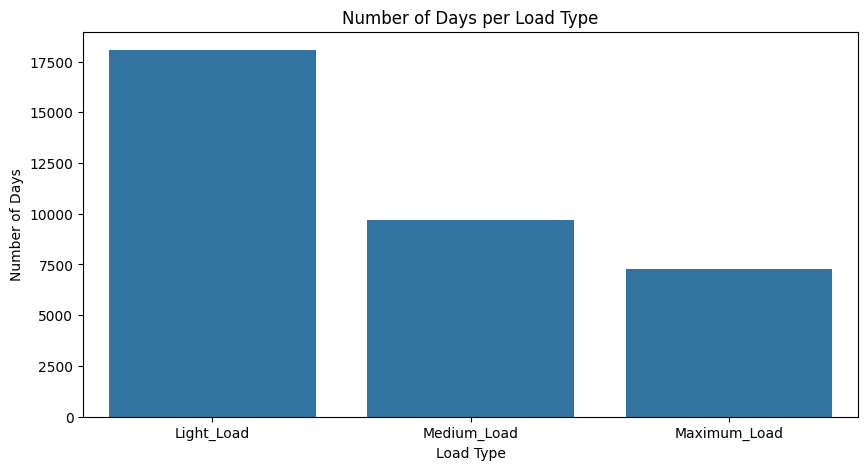

In [11]:
# here is the code to plot how many days fall into which load type based on our data
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.countplot(x='load_type', data=data)
plt.title('Number of Days per Load Type')
plt.xlabel('Load Type')
plt.ylabel('Number of Days')
plt.show()


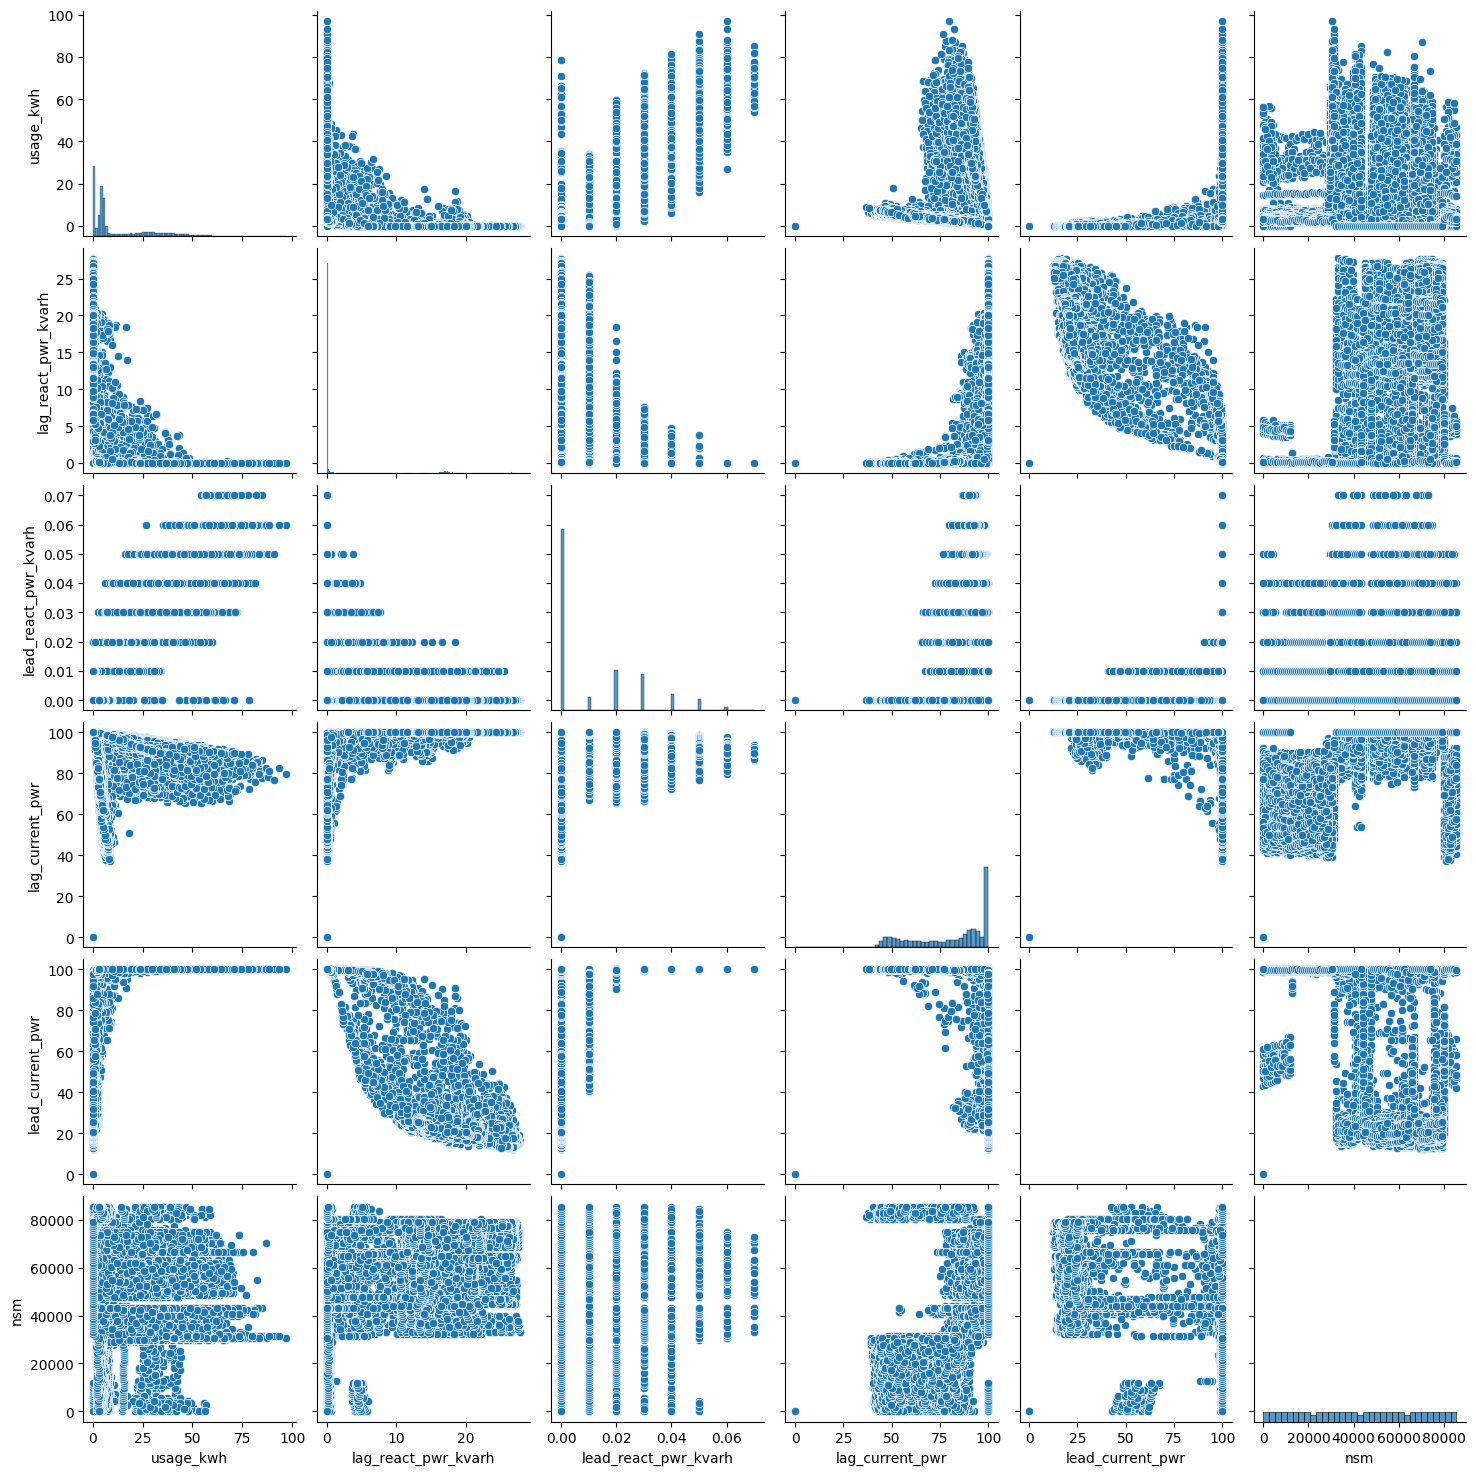

In [12]:
# here is the code for a pairplot of all of numerical data
import matplotlib.pyplot as plt
import numpy as np
sns.pairplot(data.select_dtypes(include=np.number))
plt.show()

The pairplot shows us that there are many linear connections betweens the
numerical columns of our data. There is a lot of information contained within our data, which makes it hard to make direct correlations between the specific points of the data. I can however see that almost all of the data has a linear correlation with each other.

### Splitting Data into Train/Test

In [15]:
# here is the code to split our data, with y being the usage_kwh data column, and x being every other column
X = data.drop('usage_kwh', axis=1)
y = data['usage_kwh']
X.head()


,,lag_react_pwr_kvarh,lead_react_pwr_kvarh,lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
01/01/2018 00:15,3.17,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
01/01/2018 00:30,4.00,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
01/01/2018 00:45,3.24,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
01/01/2018 01:00,3.31,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
01/01/2018 01:15,3.82,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [16]:
# here is the code to split the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Building the Pipeline

In [ ]:
# here is the code to create a column transformer that will OneHotEncode the categorical variables and scale the numerical variables of our data using a MinMax scaler

import numpy as np
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

ct = ColumnTransformer([
        ('scaler', MinMaxScaler(), numerical_features),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [18]:
# Here is the code to Create a pipeline that will transform the data and then runs the pipeline through a LinearRegression.

from sklearn.linear_model import LinearRegression

pipeline = Pipeline([
    ('transformer', ct),
    ('model', LinearRegression())
])


### Executing the Model

In [19]:
# here is the code to Run the pipeline to fit the Linear Regression Model.

pipeline.fit(X_train, y_train)


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr', 'nsm']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['week_status', 'day_of_week',
                                                   'load_type'])])),
                ('model', LinearRegression())])

### Evaluating Model

In [20]:
# here is the code to Run the pipeline to predict the y values from the test data set and save them in a variable called y_pred.

y_pred = pipeline.predict(X_test)


In [23]:
#  here is the code to Calculate the root mean squared error for both train and test samples.

y_train_pred = pipeline.predict(X_train)
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_pred, squared=False)

print(f"Root Mean Squared Error (Train): {rmse_train}")
print(f"Root Mean Squared Error (Test): {rmse_test}")


Root Mean Squared Error (Train): 6.3635037314628
Root Mean Squared Error (Test): 6.37106912442465


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


since our mean squared error for both the train and test are very similar, we know that our pipline did a good job of using the training to identify the test subjects. Sadly since our root mean squared error is almost 6.5, that means that our data does have a decent amount of mistakes within it. This could be due to the fact that We did not clean up the data before we split it into testing and training. The data could have many duplicates, and or many null items contained within it that our pipeline would have problems dealing with.

In [24]:
# here is the code to Calculate the R-squared value of the model.

r2 = r2_score(y_test, y_pred)
print(f"R-squared (Test): {r2}")


R-squared (Test): 0.8498730385370498


since our r2 score is 85% that tells us that our y test has a high correlation with our y predictions. This means that 85% of the variabilty observed in the targets is explained in the regression model that we used. This means that our model was trained well and that the independent variables in our data set are effective in explaining the variabilty in dependant variable.

In [25]:
# here's the code to display the intercept value(bias)  and coefficients of the model. (These will be two different lines of code).

print(f"Intercept: {pipeline.named_steps['model'].intercept_}")
print(f"Coefficients: {pipeline.named_steps['model'].coef_}")


Intercept: 2105602079999.2312
Coefficients: [-7.21353760e+00  7.55465590e+01 -2.58583460e+01 -1.51646124e+01
 -1.11254050e+00 -5.11372558e+10  1.82767880e+11  1.29071293e+11
  1.29071293e+11 -1.04833842e+11 -1.04833842e+11  1.29071293e+11
  1.29071293e+11  1.29071293e+11 -2.18353612e+12 -2.18353612e+12
 -2.18353612e+12]


### Conclusion
Write a general conclusion about the results of your model.

I do not belive that my pipeline does a good job of predicting the kwh usage. The higher rmse score of 6.4 indicates that there is a relatively higher difference between the predicted and actual values of our kwh usage. I believe that this is due to the fact that I did not clean up the data set and get rid of all of the duplicate values and the null values that are in the data set. The .85 r squared value does however tell me that there is a high correlation between the test values and the prediction values, so if I were to go and clean up the data, then there is a chance that this could be a good pipeline since our test values and prediction values are correlated well.

## Problem 2

### Reading the Data

In [26]:

# here is the code to re code the 'week_status' column into 2 columns weekdays and the weekend.
data['week_status'] = data['week_status'].map({'Weekday': 1, 'Weekend': 0})


### Splitting Data into Train/Test

In [28]:
# splits the date into an y which is the week_status, and an x which is every thing else in our dataset
x = data.drop(['week_status', 'day_of_week'], axis=1)
Y = data['week_status']


In [29]:
# here is the code to Split the data into Train/Test sets.
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)


### Building the Pipeline

In [37]:
# here is the code to create a column transformer that will OneHotEncode the categorical variables and scale the numerical variables of our data using a MinMax scaler

numerical_features = x.select_dtypes(include=np.number).columns.tolist()
categorical_features = x.select_dtypes(include=['object']).columns.tolist()

ct2 = ColumnTransformer([
        ('scaler', MinMaxScaler(), numerical_features),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


### Executing the Model

In [32]:

# Here is the code to Create a pipeline that will transform the data and then runs the pipeline through a KNeighborsClassifier.
pipeline2 = Pipeline([
    ('transformer', ct2),
    ('model', KNeighborsClassifier())
])

# here is the code to Run the pipeline to fit the KNeighborsClassifier.

pipeline2.fit(x_train, Y_train)


Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  ['usage_kwh',
                                                   'lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr', 'nsm']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['load_type'])])),
                ('model', KNeighborsClassifier())])

### Evaluating Model

In [33]:
# here is the code to Run the pipeline to predict y values from the test data set
y_pred = pipeline2.predict(x_test)


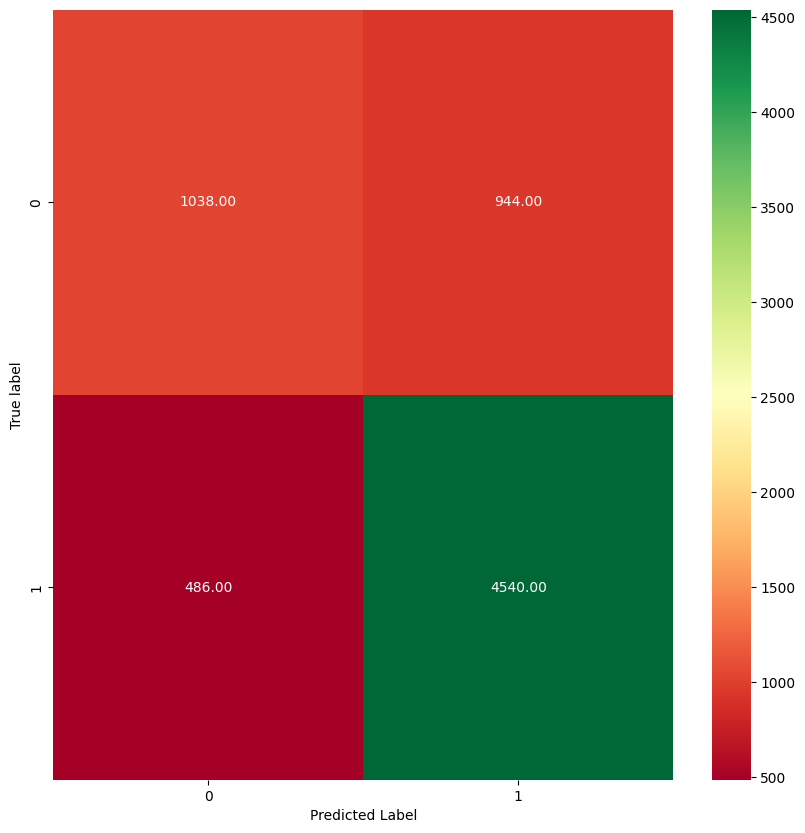

In [34]:
# here is the code to generate the confusion matrix.

plot_cm(Y_test, y_pred)


In [35]:
# here is the code to Calculate the precision, recall, and F1 score.

precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Precision: 0.8278628738147338
Recall: 0.9033028253083963
F1 Score: 0.8639391056137012


the precision score being 0.83 tells us that around 83% of the predicted labels and the true labels were acurately predicted. The 90% on the recall tells us that most of the possitve guesses were in fact positive guesses, and that there were very few false positives, which we can see from our confusion matrix. The 86% F1 score tells us that overall our pipeline model had an 86% accuarcy rate on correclty guessing true positives and true negatives while around 14% of the guesses were either false postives or false negatives.

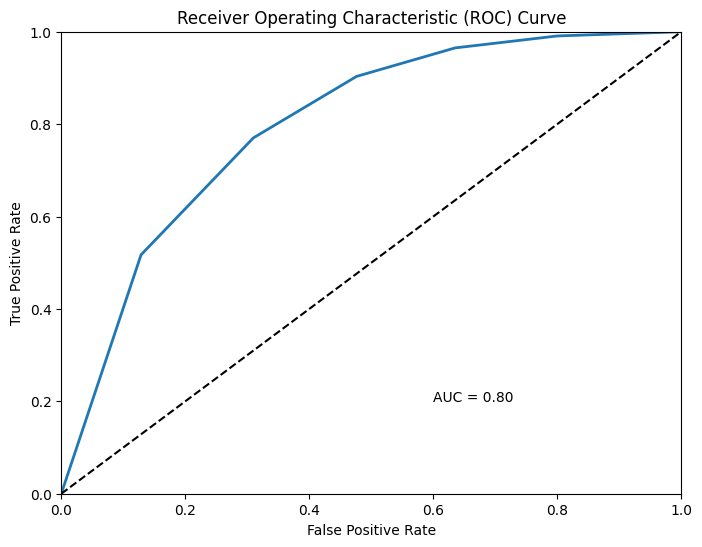

In [36]:
import matplotlib.pyplot as plt
# here is the code for generating probability predictions
y_pred_proba = pipeline2.predict_proba(x_test)[:, 1]

# here is the code to generate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = roc_auc_score(Y_test, y_pred_proba)

# here is the code to plot the ROC curve
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.text(0.6, 0.2, f'AUC = {roc_auc:.2f}')
plt.show()

the ROC curve that I plotted shows that the pipeline does a very good job at guessing the days of the week vs the weekend. the AUC of 0.8 tells me that around 80% of our guesses were accurate, which is a very good score to achieve. The graph has a nice curve that we are looking for a good pipeline to achieve. while a perfect graph would be a horizontal line as close to one as possible, the nice bell shaped curve and an .80 AUC inform me that our modle performed well in the task of being asked to guess a weekend day from a weekday.

### Conclusion
Write a general conclusion about the results of your model.

In conclusion the results of the model were very succesful. It had around an 85% success rate of correctly predicting week days versus weekend days. The times it struggled were it had around 1000 false positives, which is problemsome, but when the test data sample was as large as this one is, that is not too bad in the grand scheme of things. I do believe that the model does do a great job of predicting whether it is given a weekday or a weekend. The ROC curve that I plotted helps to strengthen my beliefs in the model, because the graph has a very good curve to it that shows the true positive rate grows well as the model is given more and more tests compared to the false positive rate.the AUC is the slope for the area under the curve, which means that there is .80 true positve to false positive rate for our model.